# Introduction to DEA Water Observations <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls_wo_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls_wo_3)


## Background
It is important to know where water is normally present in a landscape, where water is rarely observed, and where inundation has occasionally occurred.

These observations tell us where flooding has occurred in the past, and allows us to understand wetlands, water connectivity and surface-groundwater relationships. This can lead to more effective emergency management and risk assessment.

This is the principal [Digital Earth Australia (DEA) Water Observations product](https://cmi.ga.gov.au/data-products/dea/613/dea-water-observations-landsat) (previously known as Water Observations from Space), providing the individual water observations per satellite image that are subsequently used in the following DEA Water Observations suite and related water bodies products. 

This product shows where surface water was observed by the Landsat satellites on any particular day since mid 1986. These daily data layers are termed Water Observations (WOs).

### What this product offers
DEA Water Observations provides surface water observations derived from Landsat satellite imagery for all of Australia from 1986 to present.

The WOs show the extent of water in a corresponding Landsat scene, along with the degree to which the scene was obscured by clouds, shadows or where sensor problems cause parts of a scene to not be observable. 

### Applications
The DEA Water Observations (WOs) are used to determine the area of surface water present in the corresponding satellite scene, and can be used for several water monitoring applications. Uses of the individual WOs include:

* flood extent
* amount of water in water bodies, major rivers and the coastal zone.

As the WOs are separated from the derived statistics of the associated DEA Water Observations statistical products, the WOs are most useful for performing analyses requiring the investigation of surface water extent for particular times rather than over long term time series.

### Publications
* Mueller, N., Lewis, A., Roberts, D., Ring, S., Melrose, R., Sixsmith, J., Lymburner, L., McIntyre, A., Tan, P., Curnow, S., & Ip, A. (2016). [Water observations from space: Mapping surface water from 25 years of Landsat imagery across Australia](https://doi.org/10.1016/j.rse.2015.11.003). Remote Sensing of Environment, 174, 341–352. 

> **Note:** For technical information about DEA Water Observations, visit the official [Geoscience Australia DEA Water Observations product description](https://cmi.ga.gov.au/data-products/dea/613/dea-water-observations-landsat).

## Description
This notebook will demonstrate how to load and analyse DEA Water Observations using Digital Earth Australia, including:

1. Inspecting the products and measurements available in the datacube
2. Loading DEA Water Observations for an example location
3. Plotting WOs using the `plot_wo` function
4. Inspecting the WOs bit flag information

---

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
import datacube
from datacube.utils import masking
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.datahandling import wofs_fuser
from dea_tools.plotting import plot_wo

/env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
dc = datacube.Datacube(app='DEA_Water_Observations')

## Available products and measurements

### List products available in Digital Earth Australia
We can use datacube's `list_products` functionality to inspect DEA Water Observations products that are available in Digital Earth Australia.
The table below shows the product name that we will use to load data, and a brief description of the product.

In [3]:
# List DEA Water Observations products available in DEA
dc_products = dc.list_products()
dc_products.loc[['ga_ls_wo_3']]

,name,description,license,default_crs,default_resolution
name,,,,,
ga_ls_wo_3,ga_ls_wo_3,Geoscience Australia Landsat Water Observation...,CC-BY-4.0,None,None


### List measurements
We can inspect the contents of the DEA Water Observations product using datacube's `list_measurements` functionality. The table also provides information about the measurement data types, units, nodata value and other technical information about each measurement.

In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc[['ga_ls_wo_3']]

,,name,dtype,units,nodata,aliases,flags_definition,spectral_definition
product,measurement,,,,,,,
ga_ls_wo_3,water,water,uint8,1,1,NaN,"{'dry': {'bits': [7, 6, 5, 4, 3, 2, 1, 0], 'va...",NaN


## Loading data
Now that we know what products and measurements are available for the products, we can load WOs data from Digital Earth Australia for an example location.

As WOs are created scene-by-scene and some scenes overlap, it is important when loading data to `group_by` solar day, and ensure that the data between scenes is combined correctly by using the WOs `fuse_func`.
This will merge observations taken on the same day, and ensure that important data isn not lost when overlapping datasets are combined.

In [5]:
# Set up a region to load data
query = {
    'y': (-31.18, -31.12),
    'x': (116.84, 116.90),
    'time': ('1996-09-01', '1996-12-30'),
}

# Load DEA Water Observations data from the datacube
wo = dc.load(product='ga_ls_wo_3',
             output_crs='EPSG:3577',
             resolution=(-30, 30),
             group_by='solar_day',
             fuse_func=wofs_fuser,
             **query)

We can now view the data that we loaded.
The measurements listed under `Data variables` should match the measurements displayed in the previous [List measurements](#List-measurements) step.

In [6]:
wo

<xarray.Dataset>
Dimensions:      (time: 8, x: 215, y: 245)
Coordinates:
  * time         (time) datetime64[ns] 1996-09-05T01:22:13.540962 ... 1996-12...
  * y            (y) float64 -3.473e+06 -3.473e+06 ... -3.48e+06 -3.48e+06
  * x            (x) float64 -1.428e+06 -1.428e+06 ... -1.422e+06 -1.422e+06
    spatial_ref  int32 3577
Data variables:
    water        (time, y, x) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### Plotting data
We can plot DEA Water Observations using the `plot_wo` function. We can see that our study area includes one large and several small waterbodies which are changing in size over time. We can also see that some observations (e.g. first and fourth panels) contain clouds and cloud shadow.


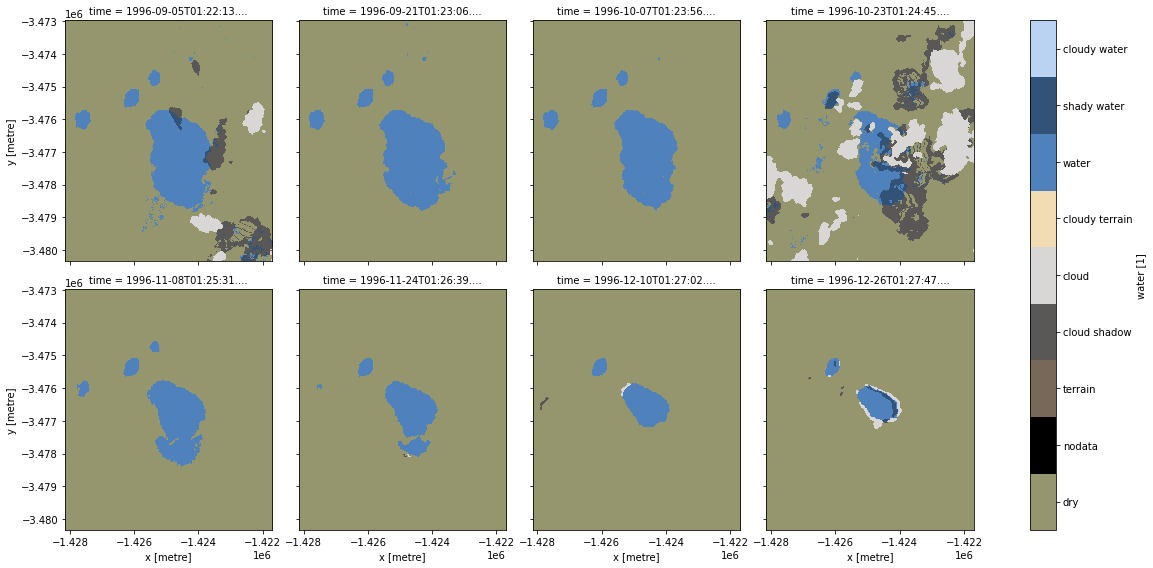

In [7]:
plot_wo(wo.water, col='time', size=4, col_wrap=4)

## Understanding WOs bit flags
WOs data are stored as a bit field. This is a binary number, where each digit of the number is independantly set based on the presence (1) or absence (0) of a particular attribute (water, cloud, cloud shadow etc). In this way, a single decimal value for each pixel can provide information about a variety of features of that pixel. 

Below is a breakdown of which bits represent which features, along with the decimal value associated with that bit being set to true.

| Attribute | Bit / position   | Decimal value |
|------|------|----|
| No data | 0:   `0-------` or `1-------` | 1|
| Non contiguous | 1:   `-0------` or `-1------` | 2 |
| Sea | 2:   `--0-----` or `--1-----` | 4 |
| Terrain or low solar angle | 3:   `---0----` or `---1----` | 8 |
| High slope | 4:   `----0---` or `----1---` | 16 |
| Cloud shadow | 5:   `-----0--` or `-----1--` | 32 |
| Cloud | 6:   `------0-` or `------1-` | 64 |
| Water | 7:   `-------0` or `-------1` | 128 |

Any combinations of flags can be combined to create a unique decimal value. 
For example, a value of 136 indicates that water (128) AND terrain shadow / low solar angle (8) were observed for the pixel (i.e. 128 + 8 = 136).
A value of 144 would indicate water (128) AND high slope (16) were observed (128 + 16 = 144).

This flag information is available inside the loaded data and can be visualised as below:

In [8]:
# Display details of available flags
flags = masking.describe_variable_flags(wo)
flags['bits'] = flags['bits'].astype(str)
flags.sort_values(by='bits')

,bits,values,description
nodata,0,"{'0': False, '1': True}",No data
noncontiguous,1,"{'0': False, '1': True}",At least one EO band is missing or saturated
low_solar_angle,2,"{'0': False, '1': True}",Low solar incidence angle
terrain_shadow,3,"{'0': False, '1': True}",Terrain shadow
high_slope,4,"{'0': False, '1': True}",High slope
cloud_shadow,5,"{'0': False, '1': True}",Cloud shadow
cloud,6,"{'0': False, '1': True}",Cloudy
water_observed,7,"{'0': False, '1': True}",Classified as water by the decision tree
dry,"[7, 6, 5, 4, 3, 2, 1, 0]",{'0': True},No water detected
wet,"[7, 6, 5, 4, 3, 2, 1, 0]",{'128': True},Clear and Wet


### Masking using WOs bit flags
We can convert the WOs bit field into a binary array containing True and False values. 
This allows us to use the WOFL data as a mask that can be applied to other datasets.

The `make_mask` function allows us to create a mask using the flag labels (e.g. "wet" or "dry") rather than the binary numbers we used above. For example, we can easily identify pixels that were wet in each image (i.e. yellow) by passing the flag `wet=True`:

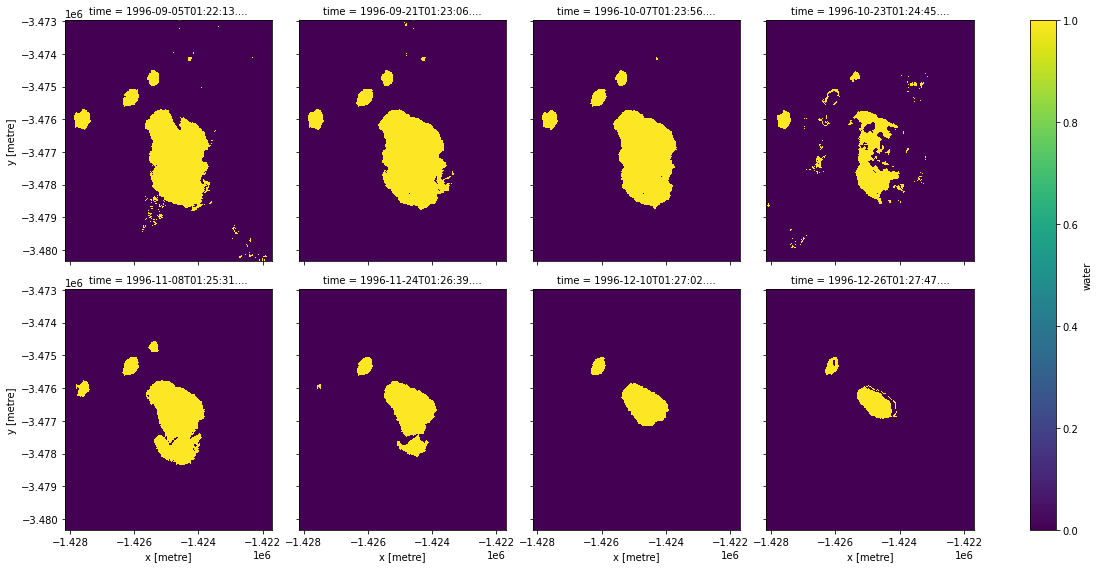

In [9]:
# Keeping only dry, non-cloudy pixels
wo_wet = masking.make_mask(wo, wet=True)

# Plot output mask
wo_wet.water.plot(col='time', size=4, col_wrap=4)

> **Note:** For more technical information about the DEA Water Observations's bit flags, refer to the Details tab of the official [Geoscience Australia DEA Water Observations product description](https://cmi.ga.gov.au/data-products/dea/613/dea-water-observations-landsat#details).

## Example application: mapping inundation frequency and tracking changes in surface water over time
The following section will demonstrate a simple analysis workflow based on DEA Water Observations. 
In this example, we will process our loaded WOs data so that we can map inundation frequency across our study area, and consistently track changes in surface water area over time.


### Identifying clear pixels

In the previous example, we used the `wet=True` bit flag to identify pixels that contained water. However, using wet pixels on their own can lead to misleading results. For example, the fourth image above gives the false impression that our waterbody reduced significantly in size, when in reality part of the waterbody was obscured by cloud and cloud shadow. 

To deal with this, we first need to remove cloud, cloud shadow and other sources of invalid data from our datset. We can do this by identifying "clear" pixels, i.e. those that were observed as either wet *or* dry by the DEA Water Observations algorithm. The resulting images will show clear pixels as yellow, and unclear pixels as purple:

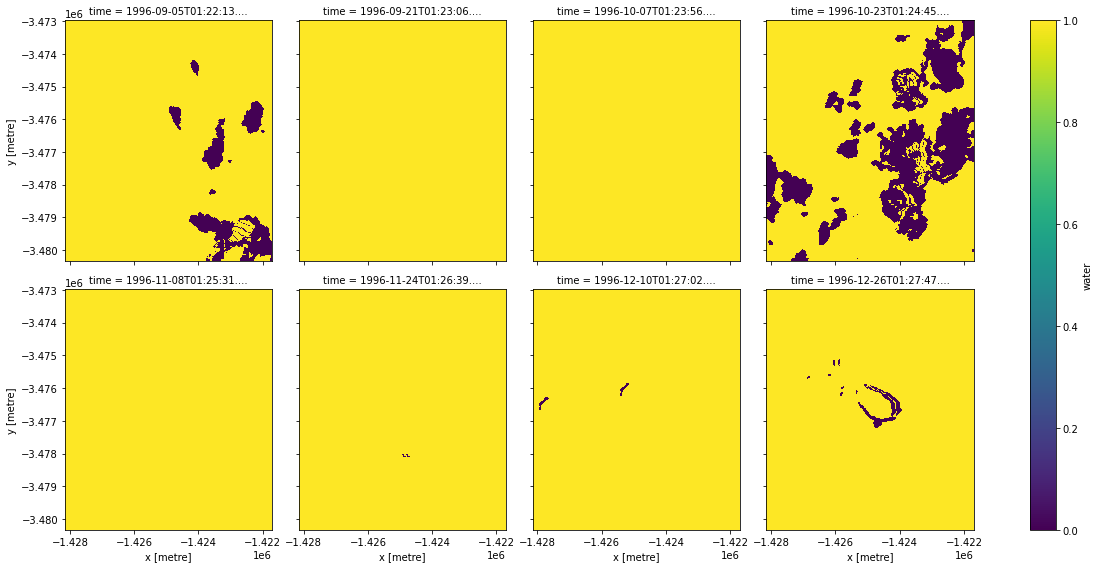

In [10]:
# Identify clear pixels that were either dry or clear
wo_dry = masking.make_mask(wo, dry=True)
wo_clear = wo_wet + wo_dry

# Plot clear pixels over time
wo_clear.water.plot(col='time', size=4, col_wrap=4)

We can also achieve a similar result by combining multiple bit flags.
When chaining flags together, they will be combined in a logical AND fashion:

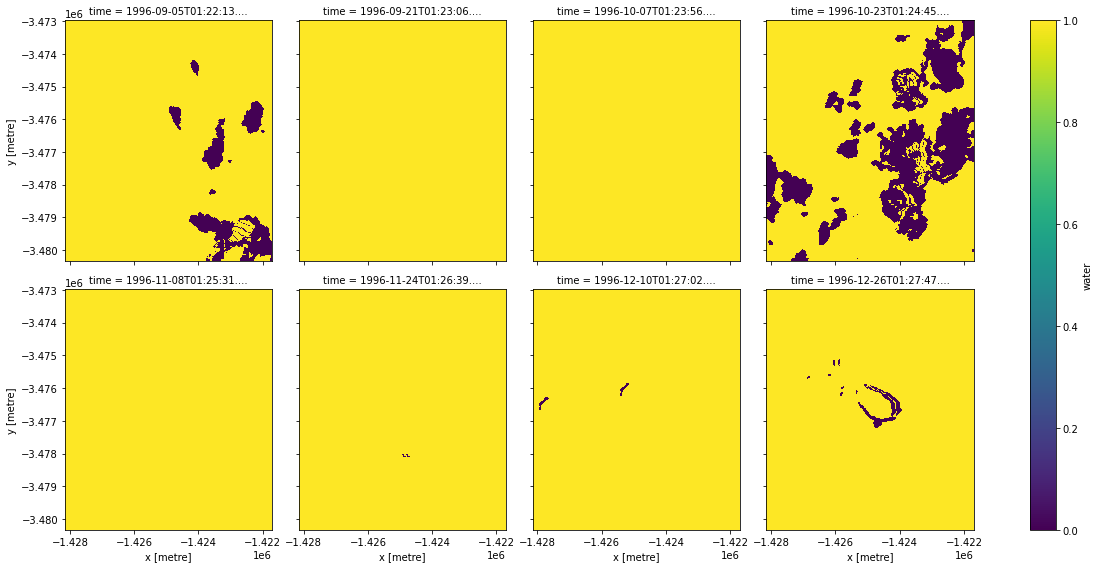

In [11]:
# Identify clear pixels that were not cloud, shadow or nodata
wo_clear = masking.make_mask(wo, cloud_shadow=False, cloud=False, nodata=False)

# Plot clear pixels over time
wo_clear.water.plot(col='time', size=4, col_wrap=4)

We can then use this as a mask to remove unclear pixels from our data. When we plot this, we can see that these pixels have now been set to `NaN` (i.e. white areas below):

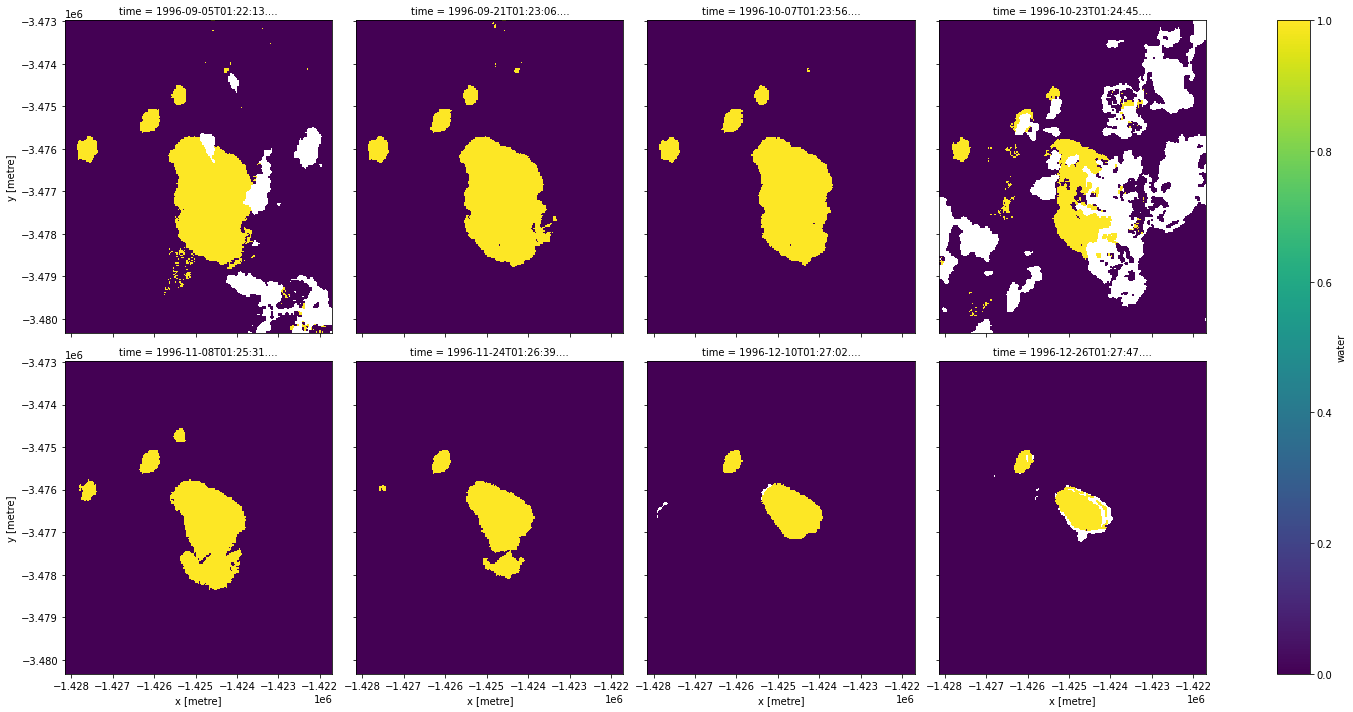

In [12]:
# Apply clear data as a mask to remove unclear pixels
wo_masked = wo_wet.where(wo_clear).water

# Plot the masked data
wo_masked.plot(col='time', size=5, col_wrap=4)

### Inundation frequency
Now that we have correctly masked clouds, shadow and other invalid data, we can calculate the frequency that each pixel in our study area was observed as wet.
We can do this by taking the mean wetness of each pixel through time. 

Dark colours indicate pixels that were wet almost 100% of our time period, while light blue pixels only occasionally contained water.

Text(0.5, 1.0, 'Inundation frequency (% wet observations)')

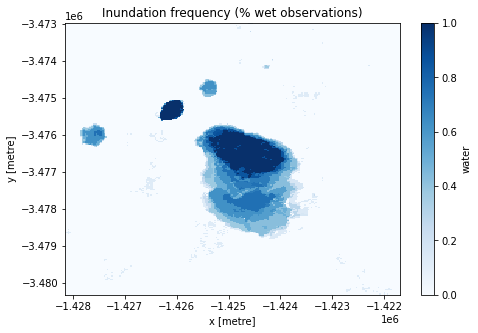

In [13]:
# Calculate mean wetness through time
wo_freq = wo_masked.mean(dim=['time'])

# Plot with dark blue = high frequency
wo_freq.plot(size=5, cmap='Blues')
plt.title('Inundation frequency (% wet observations)')

### Surface water over time
Similarly, we can track the percentage of our study area that contained water over time to inspect trends and changes in surface water.

To do this, we can take the mean surface water percent across each observation in our dataset:

Text(0.5, 1.0, 'Surface water over time (%)')

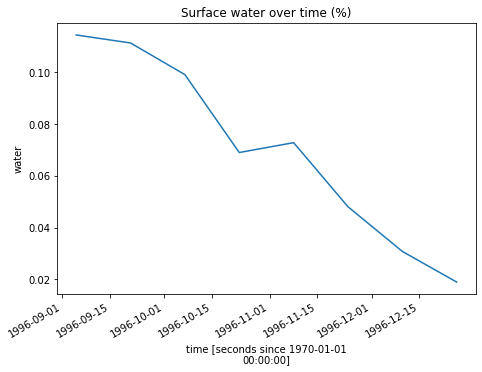

In [14]:
# Calculate percent surface water over time
wo_time = wo_masked.mean(dim=['x', 'y'])

# Plot as a line graph
wo_time.plot(size=5)
plt.title('Surface water over time (%)')

### Dropping poorly observed scenes
In the line chart above, we can see that surface water has smoothly reduced over time, except for a small deviation at our fourth observation. This occured because cloud and show obscured part of that image, slightly distorting our calculation of how full the waterbody was at that moment in time.

To compare surface water consistently, we can restrict our analysis to observations where less than (for example) 20% of pixels contained cloud, shadow or other invalid pixels. This allows us to obtain a more reliable view of how surface water has changed at our location:

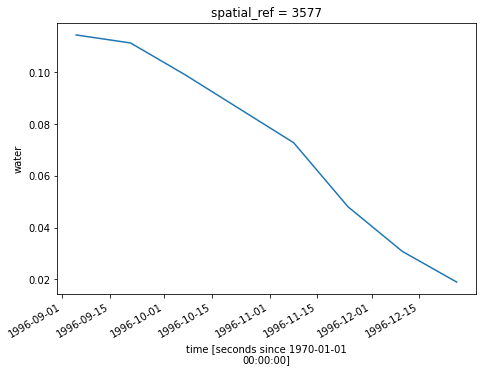

In [15]:
# Calculate the percent of nodata pixels in each observation
percent_nodata = wo_masked.isnull().mean(dim=['x', 'y'])

# Use this to filter to observations with less than 20% nodata
wo_masked = wo_masked.sel(time=percent_nodata < 0.2)

# The data now contains only three observations
wo_masked.mean(dim=['x', 'y']).plot(size=5)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** September 2021

**Compatible datacube version:** 

In [16]:
print(datacube.__version__)

1.8.5


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)